In [1]:
import tensorflow as tf

In [2]:
print(tf.__version__)

2.17.0


In [5]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [7]:
# Importing the dataset
dataset = pd.read_csv('Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [9]:
## Divide the dataset into independent and dependent features
X = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]

In [10]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [11]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [15]:
## Feature Engeering 
geography = pd.get_dummies(X['Geography'], drop_first=True)
gender = pd.get_dummies(X['Gender'], drop_first=True)

In [17]:
## concatenate these varible with dataframe
X=X.drop(['Geography','Gender'], axis=1)
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [19]:
X=pd.concat([X,geography,gender], axis=1)

In [22]:
# Splitting the dataset into Training set and Test Set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [23]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [24]:
# Part 2 - Now let's make the ANN!

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU
from tensorflow.keras.layers import Dropout

In [26]:
# Initialising the ANN
classifier = Sequential()

In [40]:
# Adding the input layer
classifier.add(Dense(units=11,activation='relu'))

In [47]:
# Adding the first hidden layer
classifier.add(Dense(units=7,activation='relu'))

In [51]:
# Adding the second hidden layer
classifier.add(Dense(units=6,activation='relu'))

In [52]:
# Adding the Output hidden layer
classifier.add(Dense(units=1,activation='sigmoid'))

In [53]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [54]:
model_history=classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=50)

Epoch 1/50
536/536 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7972 - loss: 0.6612 - val_accuracy: 0.7955 - val_loss: 0.5876
Epoch 2/50
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8050 - loss: 0.5675 - val_accuracy: 0.7955 - val_loss: 0.5394
Epoch 3/50
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8006 - loss: 0.5288 - val_accuracy: 0.7955 - val_loss: 0.5183
Epoch 4/50
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7898 - loss: 0.5217 - val_accuracy: 0.7955 - val_loss: 0.5104
Epoch 5/50
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7908 - loss: 0.5150 - val_accuracy: 0.7955 - val_loss: 0.5077
Epoch 6/50
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8097 - loss: 0.4896 - val_accuracy: 0.7955 - val_loss: 0.5069
Epoch 7/50
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7989 - loss: 0.5024 - val_accuracy: 0.7955 - val_loss: 0.5066
Epoch 8/50
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8000 - loss: 0.5007 - val_accuracy: 0.

In [55]:
# list all data in history

print(model_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


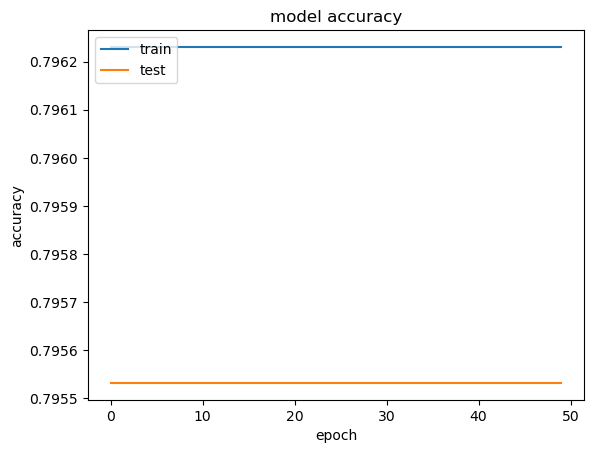

In [56]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

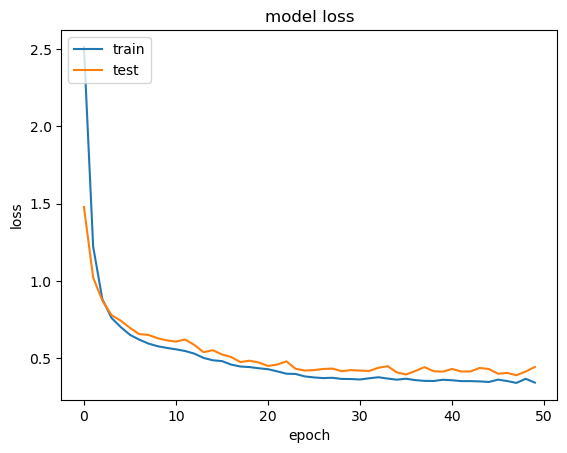

In [34]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [57]:
# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [58]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1595,    0],
       [ 405,    0]], dtype=int64)

In [59]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

In [60]:
score

0.7975